# Retropropagación de Red Densa

Primero se va a importar todas las librerías que se requieren para este trabajo.

In [2]:
import numpy as np

Después se define la función de activación como una función y su derivada, que se utilizarán después.

In [3]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

In [4]:
def derivada_sigmoide(x):
    return np.multiply(sigmoide(x), (1.0 - sigmoide(x)))

In [5]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

In [6]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

# Calculo en sentido normal

In [7]:
def hacia_adelante(x, W1, b1, W2, b2, W3, b3):
    z2 = np.dot(W1.T, x[:, np.newaxis]) + b1
    a2 = sigmoide(z2)
    z3 = np.dot(W2.T, a2) + b2
    a3 = sigmoide(z3)
    z4 = np.dot(W3.T, a3) + b3
    y_hat = sigmoide(z4)
    #print(f'Y_HAT = {y_hat}')
    #print(f'a3 = {a3}')
    return z2, a2, z3, a3, z4, y_hat

In [8]:
from turtle import shape


def retropropagacion(X,y, alpha=0.01, n_epocas =100, n_ocultas=10):
    n_ejemplos=X.shape[0]
    n_entradas=X.shape[1]
    #print(n_ejemplos,n_entradas)
    #Inicializando las variables de W y b
    #W1 es una matriz de tamaño NumEntradasxNumdecapasdelared 
    #Mejor explicado en el dibujo
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    #W2 es una matriz de tamaño NumdeCapasdelaredxNumdecapasdelared 
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b2 = np.zeros((n_ocultas, 1))
    #W3 al ser la capa de salida es de tamaño NumdeCapasdelaredx1 al ser la salida binaria 
    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b3 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))

    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, y_hat = hacia_adelante(X[j], W1, b1, W2, b2, W3, b3) 
            
            #Se hará la retropropagacion para W3 y b3
            dz4= y_hat-y[j]
            dW3=np.outer(a3,dz4)
            db3=dz4
            #print(y[j])
            #Ahora para W2 y b2
            dz3= np.dot(W3,dz4)* derivada_sigmoide(z3)
            dW2=np.outer(a2, dz3)
            db2=dz3

            #Finalmente para W1 y b1
            dz2=np.dot(W2,dz3)* derivada_sigmoide(z2)
            dW1=np.outer(X[j], dz2)
            db1=dz2

            #Actualización de los parámetros
            #print(type(W2))
            W3=W3-alpha*dW3
            b3=b3-alpha*db3
            #print(W3.shape,dz4.shape)
            W2=W2-alpha*dW2
            b2=b2-alpha*db2
            
            W1=W1-alpha*dW1
            b1=b1-alpha*db1

            y_predicha[j]= y_hat

        #Calculo de pérdidas en cada época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))
    return W1,W2,W3,perdidas, exactitudes


# Primer prueba para la red 

In [9]:
# ejemplo (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T
print(y.shape)

(4, 1)


In [10]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 0.5, 
                                                 n_epocas = 500,
                                                 n_ocultas = 20)

Epoch 0: Pérdida = 4.635396037575155 Exactitud = 50.0
Epoch 1: Pérdida = 4.323590601178358 Exactitud = 50.0
Epoch 2: Pérdida = 4.126310272935596 Exactitud = 50.0
Epoch 3: Pérdida = 3.9573180354349056 Exactitud = 50.0
Epoch 4: Pérdida = 3.817473534238595 Exactitud = 50.0
Epoch 5: Pérdida = 3.704269329238952 Exactitud = 50.0
Epoch 6: Pérdida = 3.613566018381353 Exactitud = 50.0
Epoch 7: Pérdida = 3.5408919622571897 Exactitud = 50.0
Epoch 8: Pérdida = 3.4822628576147494 Exactitud = 50.0
Epoch 9: Pérdida = 3.4344608276843713 Exactitud = 50.0
Epoch 10: Pérdida = 3.395011368454609 Exactitud = 50.0
Epoch 11: Pérdida = 3.3620519595309784 Exactitud = 50.0
Epoch 12: Pérdida = 3.334188529607278 Exactitud = 50.0
Epoch 13: Pérdida = 3.310374121217041 Exactitud = 50.0
Epoch 14: Pérdida = 3.2898159862340597 Exactitud = 50.0
Epoch 15: Pérdida = 3.271907470393643 Exactitud = 50.0
Epoch 16: Pérdida = 3.2561789372218666 Exactitud = 50.0
Epoch 17: Pérdida = 3.2422625489845127 Exactitud = 50.0
Epoch 18: Pé

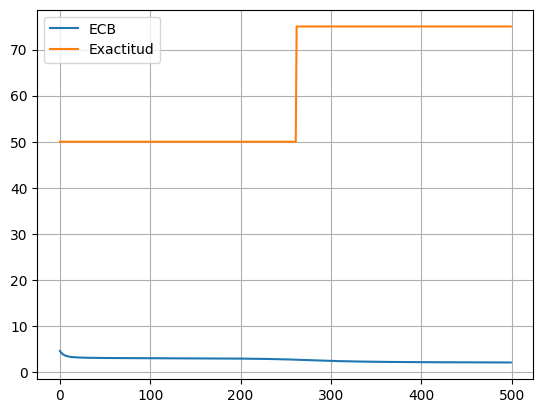

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

# Cambiando el valor de $\alpha$

In [12]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 1.0, 
                                                 n_epocas = 500,
                                                 n_ocultas = 5)

Epoch 0: Pérdida = 4.510939294047824 Exactitud = 25.0
Epoch 1: Pérdida = 4.077471648653613 Exactitud = 50.0
Epoch 2: Pérdida = 3.9097719669780875 Exactitud = 50.0
Epoch 3: Pérdida = 3.7785383957141376 Exactitud = 50.0
Epoch 4: Pérdida = 3.6826051263935833 Exactitud = 50.0
Epoch 5: Pérdida = 3.6143904244536897 Exactitud = 50.0
Epoch 6: Pérdida = 3.56557707684294 Exactitud = 50.0
Epoch 7: Pérdida = 3.529786362817096 Exactitud = 50.0
Epoch 8: Pérdida = 3.5027749602787943 Exactitud = 50.0
Epoch 9: Pérdida = 3.4818245695741012 Exactitud = 50.0
Epoch 10: Pérdida = 3.4651803174161215 Exactitud = 50.0
Epoch 11: Pérdida = 3.451681721479306 Exactitud = 50.0
Epoch 12: Pérdida = 3.440539546804972 Exactitud = 50.0
Epoch 13: Pérdida = 3.431202157600876 Exactitud = 50.0
Epoch 14: Pérdida = 3.423274175271027 Exactitud = 50.0
Epoch 15: Pérdida = 3.416465744545185 Exactitud = 50.0
Epoch 16: Pérdida = 3.4105600471912965 Exactitud = 50.0
Epoch 17: Pérdida = 3.405391961957278 Exactitud = 50.0
Epoch 18: Pér

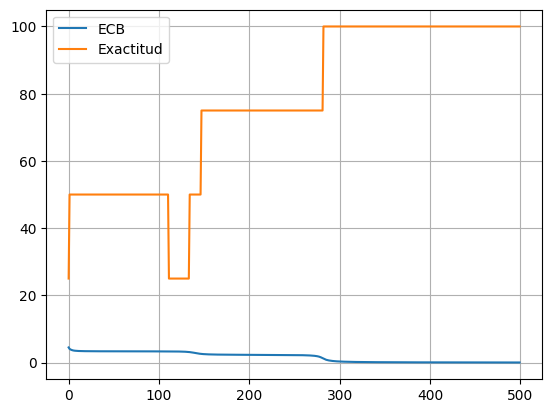

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import csv
import pandas as pd
csvFile= csv.reader(open('ValoresX.csv', "r"), delimiter = ",")
#X1=[]
#for row in csvFile:
#    X1.append(row)
#X1=np.asarray(X1)
X1 = pd.read_csv('ValoresX.csv', header=None)
X1=X1.values.tolist()
X1=np.asarray(X1)
Y1 = pd.read_csv('ValoresY.csv', header=None)
Y1=Y1.values.tolist()
Y1=np.asarray(Y1)
#Y1=Y1.T
print(Y1.shape)
#print(Y1)

(5822, 1)


In [17]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X1, 
                                                 Y1, 
                                                 alpha = 0.01, 
                                                 n_epocas = 500,
                                                 n_ocultas = 10)

Epoch 0: Pérdida = 1356.240338021865 Exactitud = 93.67914805908623
Epoch 1: Pérdida = 1281.7804189268347 Exactitud = 94.02267262109241
Epoch 2: Pérdida = 1261.388213769259 Exactitud = 94.02267262109241
Epoch 3: Pérdida = 1240.660133551955 Exactitud = 94.02267262109241
Epoch 4: Pérdida = 1225.8365938922288 Exactitud = 94.02267262109241
Epoch 5: Pérdida = 1214.774062202615 Exactitud = 94.02267262109241
Epoch 6: Pérdida = 1207.5884851822666 Exactitud = 94.02267262109241
Epoch 7: Pérdida = 1201.5267086956546 Exactitud = 94.02267262109241
Epoch 8: Pérdida = 1196.5946883568008 Exactitud = 94.02267262109241
Epoch 9: Pérdida = 1193.0378169789349 Exactitud = 94.02267262109241
Epoch 10: Pérdida = 1190.1103362501483 Exactitud = 94.02267262109241
Epoch 11: Pérdida = 1186.5575815894226 Exactitud = 94.02267262109241
Epoch 12: Pérdida = 1183.7491768845462 Exactitud = 94.02267262109241
Epoch 13: Pérdida = 1181.3869566091812 Exactitud = 94.02267262109241
Epoch 14: Pérdida = 1179.3605209374043 Exactitud

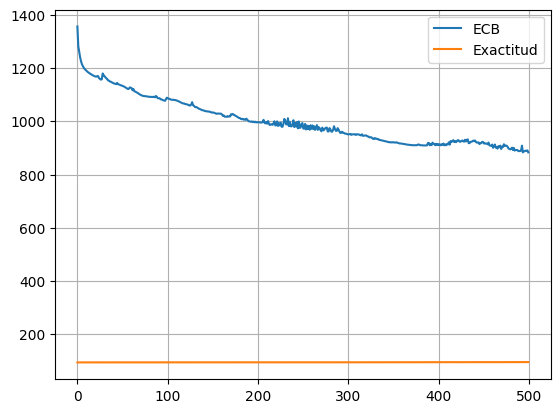

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()